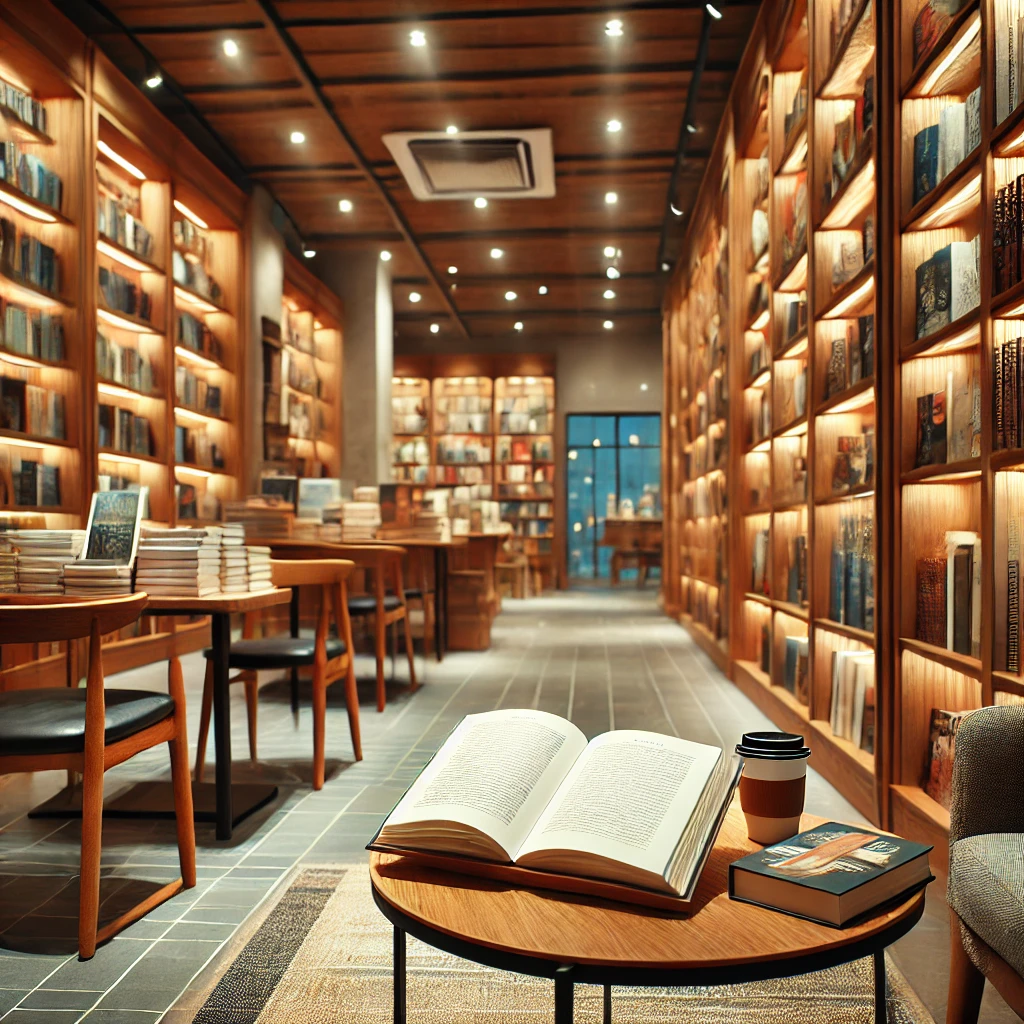

### Dataset Overview

This dataset contains comprehensive information on book sales, including various attributes such as publishing year, book name, author, language, author rating, sales figures, and publisher details. The dataset provides insights into the dynamics of the book market, allowing for detailed analysis of sales performance, pricing strategies, and reader preferences. It serves as a valuable resource for researchers, marketers, and book enthusiasts interested in understanding trends and patterns in the publishing industry.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv("Books_Data_Clean.csv") 

## Data Set Description
- **index:** The unique serial number for each book.
- **publishing_year:** The year the book was published.
- **book_name:** The name of the book.
- **author**: The author of the book.
- **language_code:** The code representing the language in which the book was written.
- **author_rating:** The average rating the author has received.
- **book_average_rating:** The average rating the book has received from readers.
- **book_ratings_count:** The total number of ratings given for the book.
- **genre:** The genre to which the book belongs.
- **gross_sales:** The gross revenue generated by the book's sales.
- **publisher_revenue:** The revenue the publisher earned from the book.
- **sale_price:** The selling price of the book.
- **sales_rank:** The rank of the book in the sales chart.
- **publisher:** The publishing company of the book.
- **units_sold:** The total number of units sold for the book.


In [6]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [7]:
df.columns  #Spelling error observed and corrected.

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [8]:
df.columns=['index', 'publishing_year', 'book_name', 'author', 'language_code',
       'author_rating', 'book_average_rating', 'book_ratings_count', 'genre',
       'gross_sales', 'publisher_revenue', 'sale_price', 'sales_rank',
       'publisher', 'units_sold']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   publishing_year      1069 non-null   float64
 2   book_name            1047 non-null   object 
 3   author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   author_rating        1070 non-null   object 
 6   book_average_rating  1070 non-null   float64
 7   book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross_sales          1070 non-null   float64
 10  publisher_revenue    1070 non-null   float64
 11  sale_price           1070 non-null   float64
 12  sales_rank           1070 non-null   int64  
 13  publisher            1070 non-null   object 
 14  units_sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

## publishing_year column

In [11]:
df['publishing_year']=df['publishing_year'].fillna(0).astype(int)

## book_name column

In [13]:
df['book_name']=df['book_name'].fillna('Unknown')

In [14]:
df['book_name']=df['book_name'].str.strip()

## language_code column
eng: İngilizce dil kodudur.
en-US: Amerikan İngilizcesi (Birleşik Devletler) dil kodudur.
en-GB: İngiliz İngilizcesi (Birleşik Krallık) dil kodudur.
en-CA: Kanada İngilizcesi dil kodudur.
fre: Fransızca dil kodudur.
spa: İspanyolca dil kodudur.
ara: Arapça dil kodudur.
nl: Felemenkçe (Hollandaca) dil kodudur.

In [16]:
df['language_code'].value_counts()

language_code
eng      737
en-US    234
en-GB     30
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

In [17]:
df['language_code'].isnull().sum()

53

In [18]:
df['language_code']=df['language_code'].fillna('Unknown')

## author_rating column
Excellent : Üst düzey yazarlardan biri. Bu yazarlar, eserleriyle dikkat çekmiş ve yüksek değerlendirme puanlarına ulaşmışlardır. Hem eleştirmenler hem de okuyucular arasında popülerdirler.

Famous : Çok tanınmış, ünlü yazarlar. Eserleri dünya çapında büyük ilgi görmüş ve uzun yıllar boyunca kalıcı başarı yakalamış yazarlardır. Bu kategorideki yazarlar genellikle geniş bir okuyucu kitlesine sahiptir.

Intermediate: Orta seviyede bir yazar. Bu kategori, yazarın bir miktar tanınmış olduğunu ve yazdığı eserlerin genel olarak olumlu değerlendirmeler aldığını gösterir. Ancak, henüz üst düzey bir başarıya ulaşmamıştır.

Novice : Yeni başlayan yazarlar. Bu kategorideki yazarlar henüz kariyerlerinin başındadır ve eserleri az sayıda kişi tarafından bilinmektedir. Genellikle ilk kitaplarını yayımlayan veya deneyim kazanmakta olan yazarlardır.

In [20]:
df['author_rating'].value_counts()

author_rating
Intermediate    625
Excellent       362
Famous           53
Novice           30
Name: count, dtype: int64

## genre column
Genre fiction: kurgu kitaplar.

Nonfiction: Gerçek olaylara dayalı kitaplar.

Fiction: Tür belirtmeyen genel kurgu kitapları.

Children: Çocuklar için yazılmış kitaplar.

In [22]:
df['genre'].value_counts()

genre
genre fiction    822
nonfiction       171
fiction           62
children          15
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   publishing_year      1070 non-null   int32  
 2   book_name            1070 non-null   object 
 3   author               1070 non-null   object 
 4   language_code        1070 non-null   object 
 5   author_rating        1070 non-null   object 
 6   book_average_rating  1070 non-null   float64
 7   book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross_sales          1070 non-null   float64
 10  publisher_revenue    1070 non-null   float64
 11  sale_price           1070 non-null   float64
 12  sales_rank           1070 non-null   int64  
 13  publisher            1070 non-null   object 
 14  units_sold           1070 non-null   int64  
dtypes: float64(4), int32(1), int64(4), obj

## Graphical analysis section

### Graph of the number of books published in the last 20 years

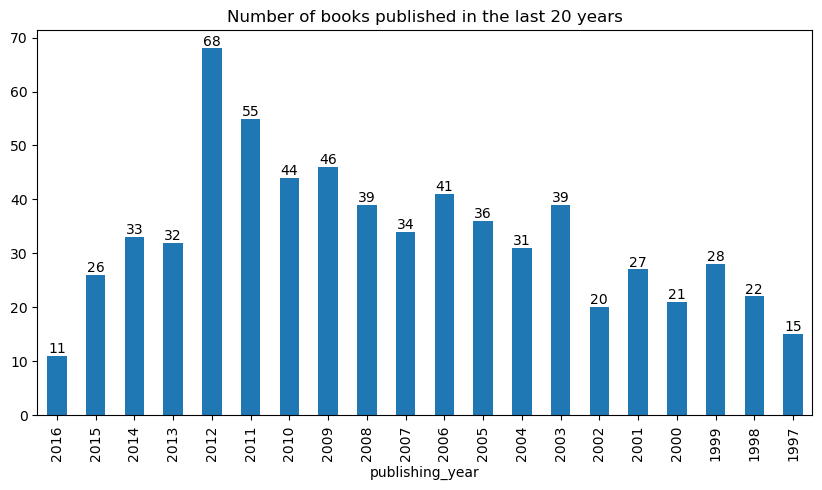

In [220]:
plt.figure(figsize=(10,5))
ax=df.publishing_year.value_counts().sort_index(ascending=False).head(20).plot(kind='bar')
plt.title("Number of books published in the last 20 years")
for p in ax.containers: 
 ax.bar_label(p)

### Analysis

It seems that the number of book publications, which reached its highest level in **2012**, is the highest in the last twenty years. There has been a significant decline in book publications in the last four years.

### The author who wrote the most books in the last 20 years

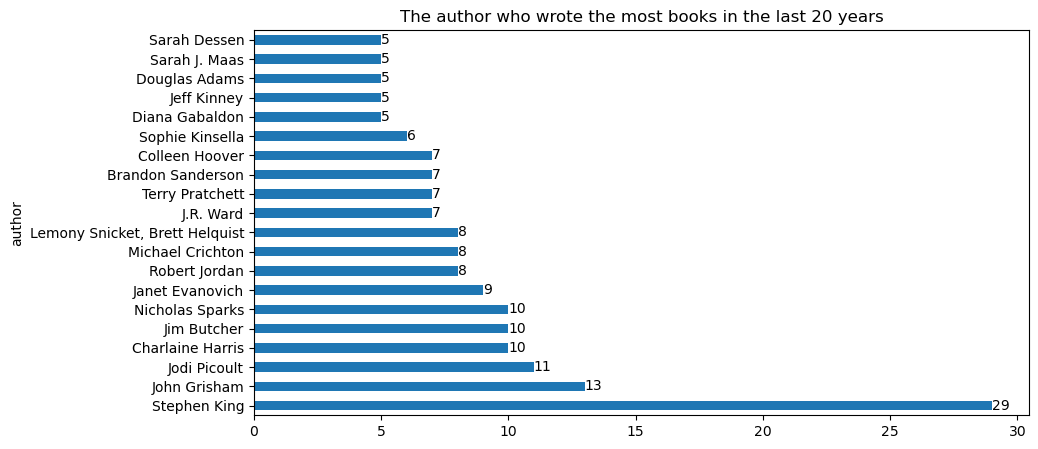

In [224]:
plt.figure(figsize=(10,5))
ax=df.author.value_counts().head(20).plot(kind='barh')
plt.title("The author who wrote the most books in the last 20 years")
for p in ax.containers: 
 ax.bar_label(p)

### Analysis

The graph shows that **Stephen King** has written more books than the average of other authors, and that he is in high demand from his readers in the same direction.

### In which language are most books written?

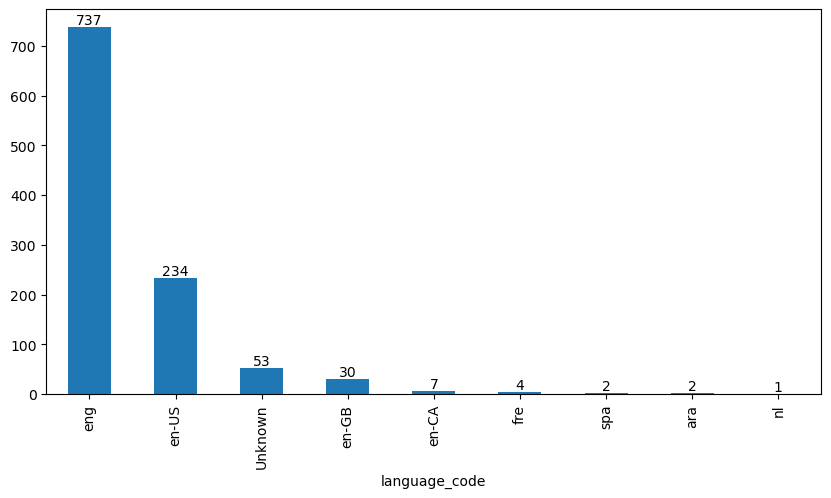

In [226]:
plt.figure(figsize=(10,5))
ax=df.language_code.value_counts().plot(kind='bar')
for p in ax.containers: 
 ax.bar_label(p)

### Analysis of Book Language Diversity

It has been concluded that there is a limited diversity of languages in the dataset, and that English, particularly American English, is dominant in book publications.

## Author popularity number in the data

In [88]:
df.author_rating.value_counts()

author_rating
Intermediate    625
Excellent       362
Famous           53
Novice           30
Name: count, dtype: int64

In [32]:
author_popularity=df.author_rating.value_counts()

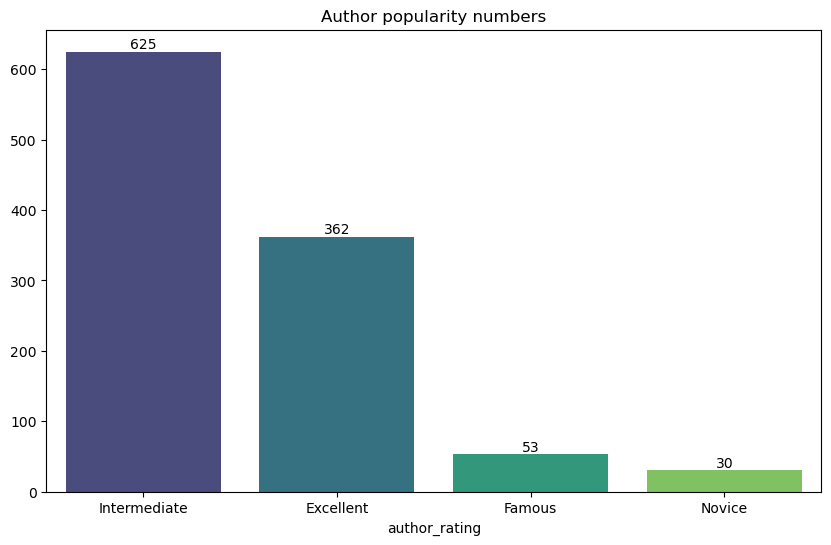

In [91]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=author_popularity.index,y=author_popularity.values,palette='viridis')
plt.title("Author popularity numbers")
for p in ax.containers: 
 ax.bar_label(p)

### Analysis

According to these data, a large portion of the published books is written by intermediate and excellent authors. Although famous authors have fewer works, these works generally attract more attention and are preferred by readers. Novice authors' books tend to receive less attention and occupy a smaller place in the publishing world.

# What types of books are in the dataset ?

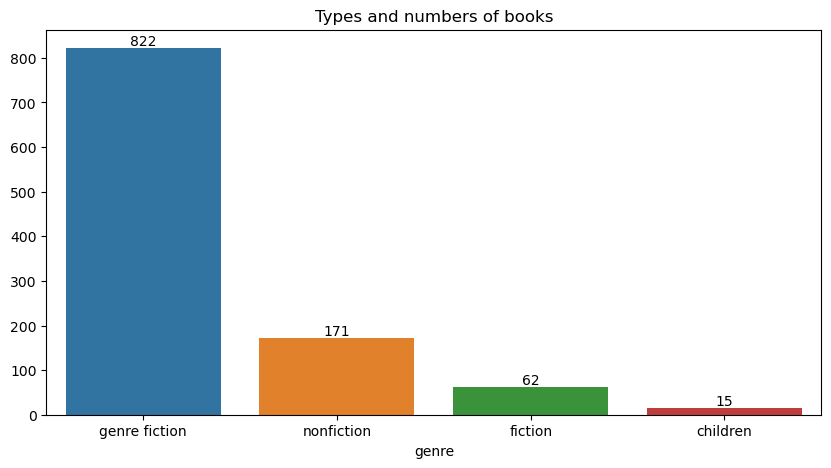

In [93]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df.genre.value_counts().index,y=df.genre.value_counts().values,hue=df.genre.value_counts().index);
plt.title("Types and numbers of books")
for p in ax.containers: 
 ax.bar_label(p)

# Genre Analysis: Understanding Reader Preferences
This data shows the number of works in different genres. 'Genre fiction' is the most popular genre with 822 titles, indicating that readers have a high interest in fictional stories. 'Nonfiction' is the second most popular genre with 171 titles and is important for readers seeking information. The 'Fiction' genre has the lowest number of titles with 62 titles and the 'children' genre has the lowest number of titles with only 15 titles. This points to the need to produce more works, especially in the field of children's literature.

# Publishers  in the dataset

In [38]:
pd.DataFrame(df['publisher'].value_counts())

,count
publisher,
"Amazon Digital Services, Inc.",600
Random House LLC,120
Penguin Group (USA) LLC,108
HarperCollins Publishers,71
Hachette Book Group,66
Simon and Schuster Digital Sales Inc,56
Macmillan,41
HarperCollins Publishing,4
HarperCollins Christian Publishing,4


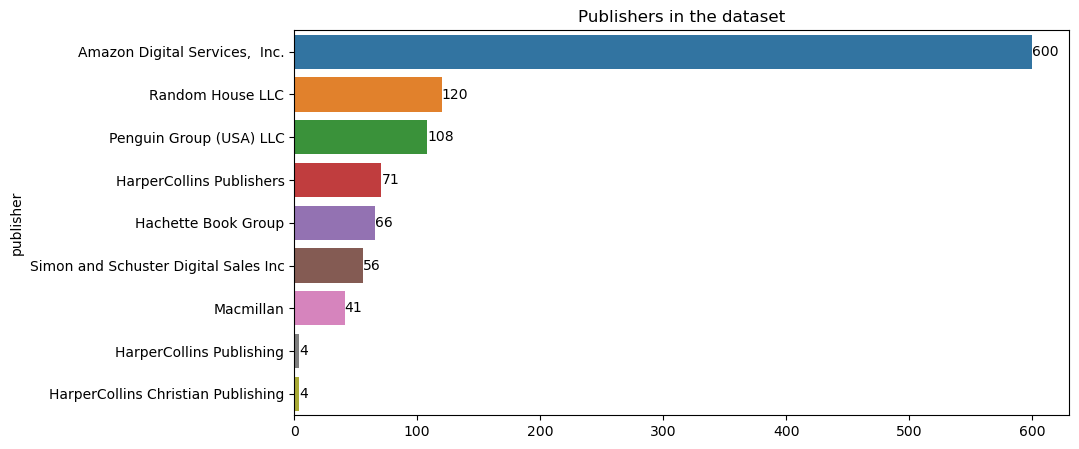

In [39]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['publisher'].value_counts().values, y=df['publisher'].value_counts().index,hue=df.publisher.value_counts().index)
plt.title('Publishers in the dataset')
for p in ax.containers:
    ax.bar_label(p)

### Analysis

The majority of publishers hold a significant market share, highlighting the increasing importance of digital publishing and the competitive strength of traditional publishers in this domain. Amazon's leading position ensures greater visibility for digital books and independent authors. Other major publishers maintain their presence through quality content and well-known authors. This situation offers readers a variety of content options, creating a broader spectrum in the publishing world.

# Top_10_publisher_revenue_with_book_name

In [186]:
max_publisher_revenue=df.sort_values(by='gross_sales',ascending=False)

In [188]:
Top_10_publisher_revenue_with_book_name=max_publisher_revenue[['book_name','publisher_revenue']].head(10)
Top_10_publisher_revenue_with_book_name

,book_name,publisher_revenue
2,Go Set a Watchman,28677.000
3,When You Are Engulfed in Flames,24750.000
4,Daughter of Smoke & Bone,22771.500
0,Beowulf,20496.000
6,The Power of Habit,16495.002
26,The Virgin Suicides,16142.436
7,Midnight in the Garden of Good and Evil,15709.200
8,Hopeless,15656.202
9,A Little Princess,14275.404
14,The Velveteen Rabbit,13078.692


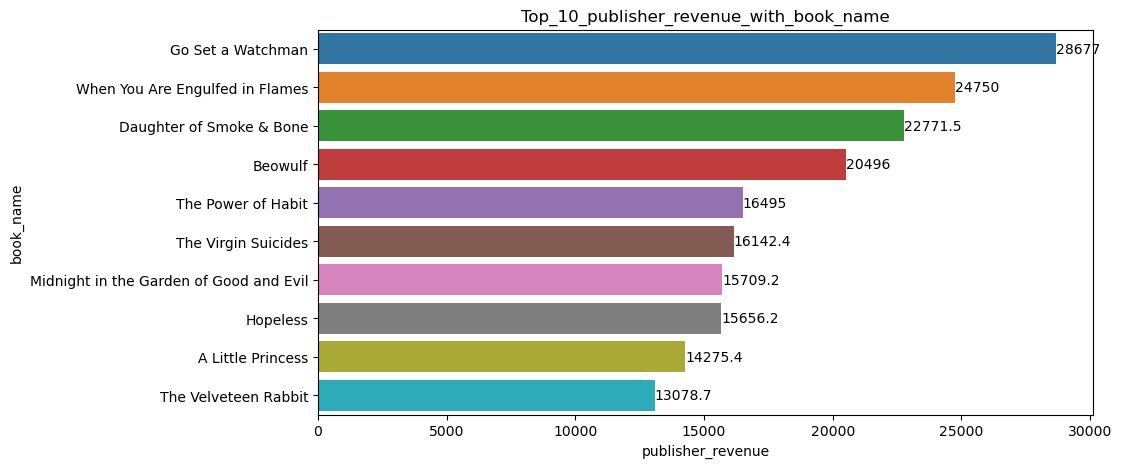

In [190]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
               x=Top_10_publisher_revenue_with_book_name['publisher_revenue'],
               y=Top_10_publisher_revenue_with_book_name['book_name'],
               hue=Top_10_publisher_revenue_with_book_name.book_name
              )
plt.title('Top_10_publisher_revenue_with_book_name')
for p in ax.containers:
    ax.bar_label(p)

### Yayıncı Gelirine Göre Kitap Analizi

Grafikte, yayıncı gelirine göre en yüksek gelir elde eden kitaplar sıralanmıştır. İlk sırada **"Go Set a Watchman"** (28,677.00 birim) yer almakta, onu **"When You Are Engulfed in Flames"** (24,750.00 birim) ve **"Daughter of Smoke & Bone"** (22,771.50 birim) takip etmektedir. Bu sonuçlar, bu kitapların okuyucular arasında yüksek bir popülariteye sahip olduğunu göstermektedir.


# Top_10_publisher_revenue_with_genre

In [193]:
Top_10_publisher_revenue_with_genre=max_publisher_revenue[['genre','publisher_revenue']].head(10)
Top_10_publisher_revenue_with_genre

,genre,publisher_revenue
2,genre fiction,28677.000
3,fiction,24750.000
4,genre fiction,22771.500
0,genre fiction,20496.000
6,genre fiction,16495.002
26,genre fiction,16142.436
7,nonfiction,15709.200
8,genre fiction,15656.202
9,genre fiction,14275.404
14,genre fiction,13078.692


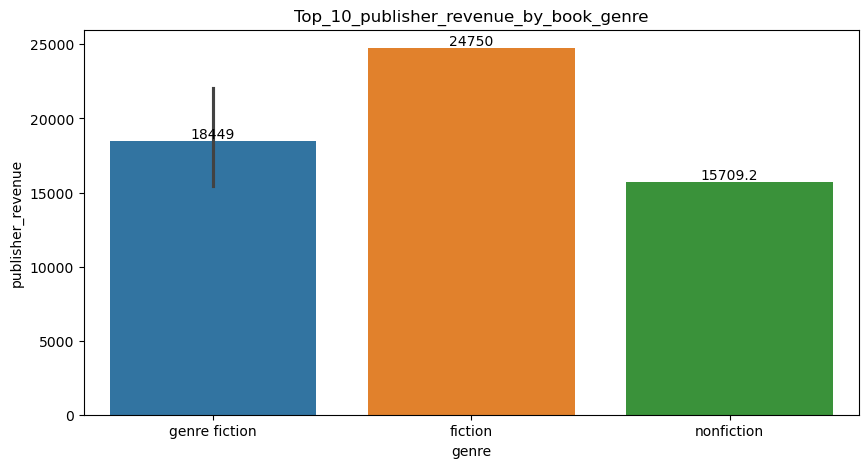

In [218]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
               x=Top_10_publisher_revenue_with_genre['genre'],
               y=Top_10_publisher_revenue_with_genre['publisher_revenue'],
               hue=Top_10_publisher_revenue_with_genre.genre
              )
plt.title('Top_10_publisher_revenue_by_book_genre')
for p in ax.containers:
    ax.bar_label(p)

# Book number graph with the author with the highest book_average_rating

In [211]:
max_book_average_rating=df[df['book_average_rating'] > 4.50]
max_book_average_rating.head(5)

,index,publishing_year,book_name,author,language_code,author_rating,book_average_rating,book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,publisher,units_sold
31,31,2010,The Way of Kings,Brandon Sanderson,eng,Famous,4.64,144822,genre fiction,2178.00,0.000,0.99,32,"Amazon Digital Services, Inc.",2200
153,153,2013,The House of Hades,Rick Riordan,eng,Famous,4.54,159774,nonfiction,668.25,400.950,0.99,165,"Amazon Digital Services, Inc.",675
186,186,2012,Unknown,Kate Egan,en-US,Famous,4.51,119915,genre fiction,2950.91,1770.546,6.01,205,HarperCollins Publishers,491
249,249,1987,Calvin and Hobbes,"Bill Watterson, G.B. Trudeau",en-US,Famous,4.61,117788,nonfiction,1886.22,1131.732,4.99,273,Penguin Group (USA) LLC,378
331,331,2014,Words of Radiance,Brandon Sanderson,eng,Famous,4.77,73572,genre fiction,741.52,444.912,2.99,354,HarperCollins Publishers,248


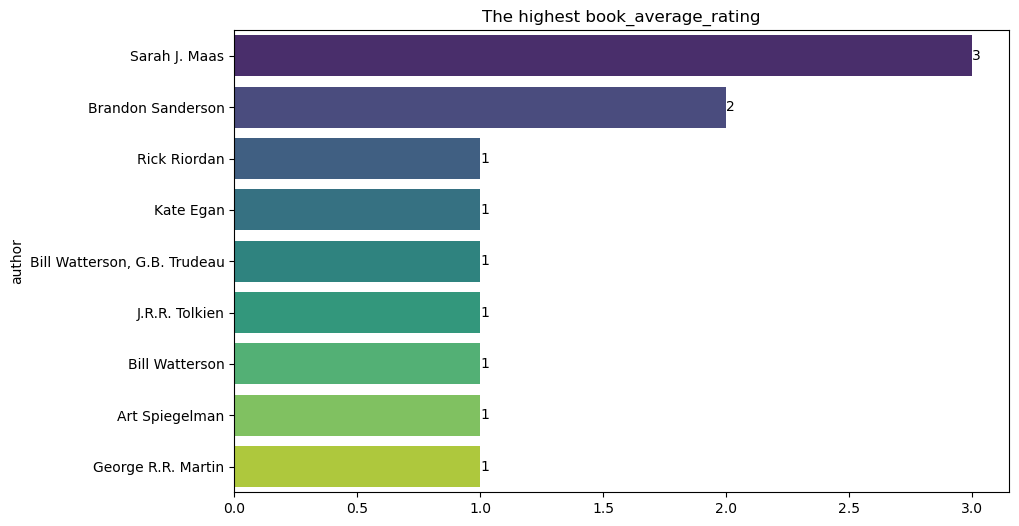

In [215]:
plt.figure(figsize=(10,6))
ax=sns.barplot(
               x=max_book_average_rating['author'].value_counts().values,
               y=max_book_average_rating['author'].value_counts().index,
               palette='viridis'
)
plt.title("The highest book_average_rating")
for p in ax.containers: 
 ax.bar_label(p)

## Analysis on the Number of Books by Authors
This list shows the number of books by the highest-rated authors. James Patterson stands out with 3 books, while many other authors are represented with only 1 book. This situation indicates that Patterson is a more prolific author and appeals to a wider readership. However, some authors can achieve great success with just a single work. This data provides a starting point for examining the relationship between authors' productivity and reader preferences.

# Best selling books

In [41]:
max_units_sold=df.sort_values(by='units_sold', ascending=False) #

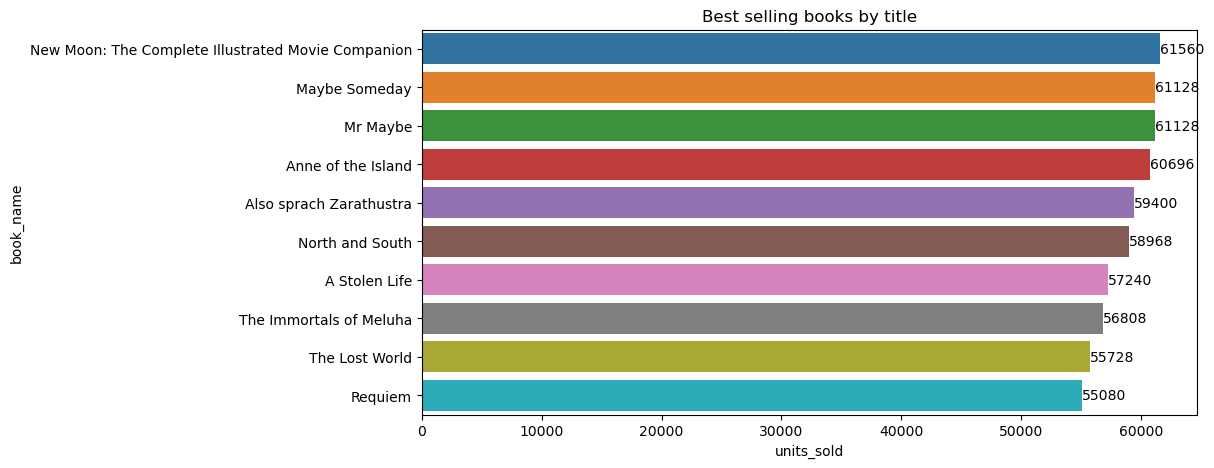

In [98]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=max_units_sold['units_sold'].head(10),y=max_units_sold['book_name'].head(10),hue=max_units_sold['book_name'].head(10))
plt.title('Best selling books by title')
for p in ax.containers:
    ax.bar_label(p)

# Best selling author

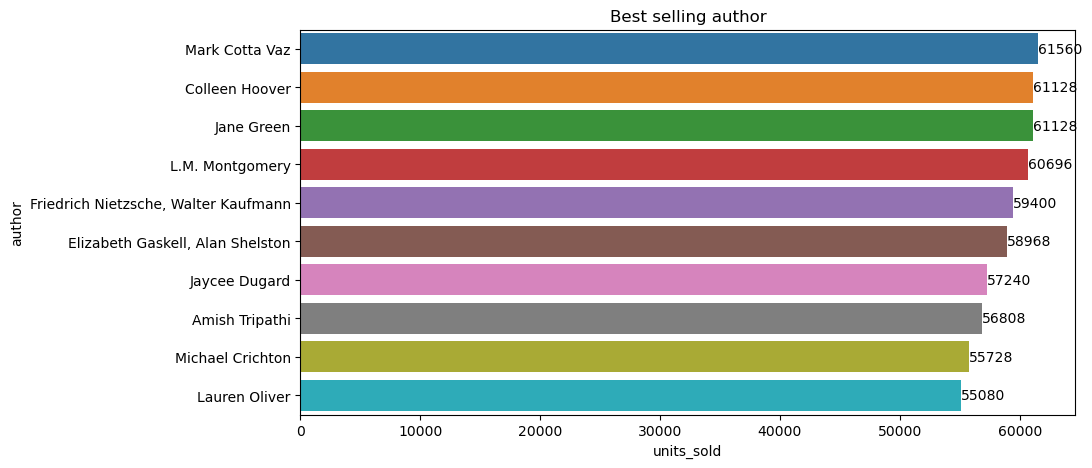

In [44]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=max_units_sold['units_sold'].head(10),y=max_units_sold['author'].head(10),hue=max_units_sold['author'].head(10))
plt.title('Best selling author')
for p in ax.containers:
    ax.bar_label(p)

# Top 20 best-selling book genres

In [46]:
max_units_sold['genre'].head(20).value_counts()

genre
genre fiction    17
nonfiction        2
fiction           1
Name: count, dtype: int64

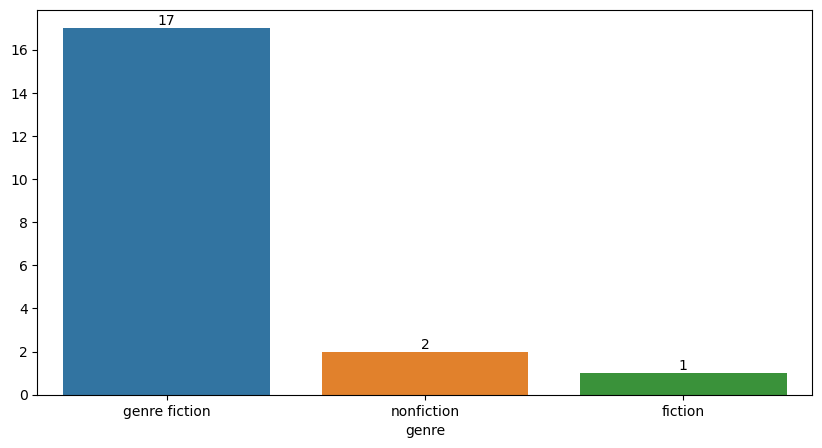

In [47]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
            x=max_units_sold['genre'].head(20).value_counts().index,
            y=max_units_sold['genre'].head(20).value_counts().values,
            hue=max_units_sold['genre'].head(20).value_counts().index
            )
for p in ax.containers:
    ax.bar_label(p)

* In this analysis, I made a genre analysis of the top 10 books with the highest sales figures. It seems that there is a lot of interest in fiction books.


# Publisher information of the 10 books that have reached the Max sales figure

In [51]:
max_units_sold[["publisher","units_sold"]].head(10)["publisher"].value_counts()

publisher
Amazon Digital Services,  Inc.    6
Penguin Group (USA) LLC           2
Random House LLC                  2
Name: count, dtype: int64

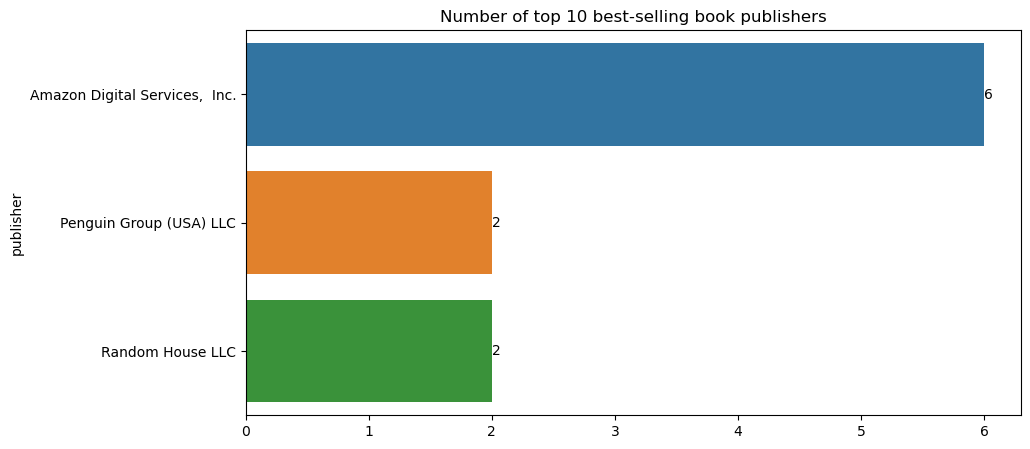

In [100]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=max_units_sold[["publisher","units_sold"]].head(10)["publisher"].value_counts().values,
               y=max_units_sold[["publisher","units_sold"]].head(10)["publisher"].value_counts().index,
               hue=max_units_sold[["publisher","units_sold"]].head(10)["publisher"].value_counts().index)
plt.title("Number of top 10 best-selling book publishers")
for p in ax.containers:
    ax.bar_label(p);

### Analysis

According to these data, Amazon's dominance in the digital platform affects the competitive strength of traditional publishers. Established publishers like Penguin and Random House may struggle to compete with the opportunities offered by Amazon if they do not establish a stronger presence in the digital space. The increasing popularity of digital books is leading readers to prefer platforms like Amazon more. This situation highlights the accelerating digital transformation in the publishing world and indicates that traditional publishing must adapt to this change.

# Unit price, total sales price analysis of the top 10 best selling books

In [167]:
max_units_sold[['book_name','units_sold']].head(10)

,book_name,units_sold
578,New Moon: The Complete Illustrated Movie Compa...,61560
579,Maybe Someday,61128
580,Mr Maybe,61128
581,Anne of the Island,60696
582,Also sprach Zarathustra,59400
583,North and South,58968
584,A Stolen Life,57240
585,The Immortals of Meluha,56808
586,The Lost World,55728
587,Requiem,55080


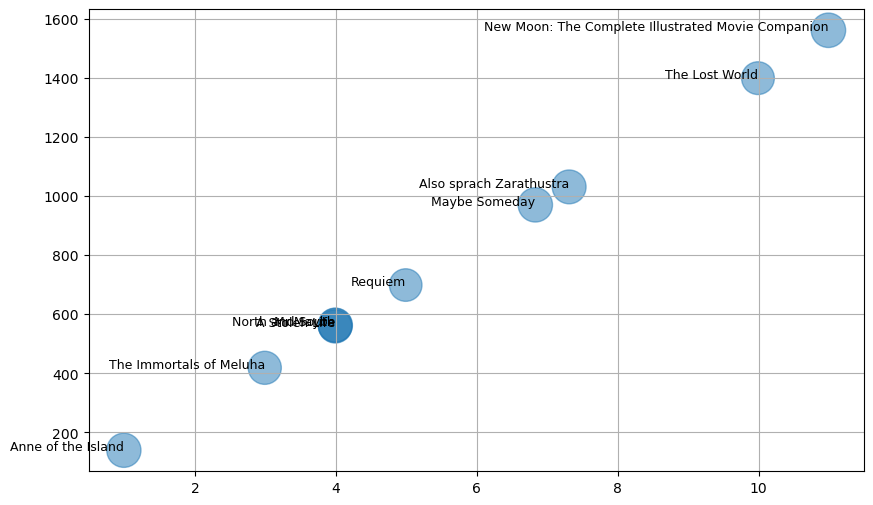

In [181]:
plt.figure(figsize=(10,6))
plt.scatter(x=max_units_sold.head(10)["sale_price"],
            y=max_units_sold.head(10)["gross_sales"],
            s=max_units_sold.head(10)["units_sold"]*0.01,
            alpha=0.5,
          )
plt.title("")
plt.grid(True)
for index, row in max_units_sold.head(10).iterrows():
    plt.text(row['sale_price'], row['gross_sales'], row['book_name'], fontsize=9, ha='right')

### Analysis

The ranking of the top 10 bestselling books appears different based on the graph. This indicates that there is not always a direct correlation between the unit prices and total revenue of the books on the bestselling list and their sales quantities. For instance, *The Lost World*, with a sales quantity of 55,728, ranks 9th on the bestseller list but stands 2nd based on the unit price and total revenue graph. This suggests that the book has a higher unit price and total earnings, making it a product with higher added value.

This analysis emphasizes that books should not be evaluated solely based on their sales quantity. Additional parameters such as unit price and total revenue should also be taken into account for a more accurate assessment. Such analyses are crucial for understanding the market value of books and reader preferences.